This notebook follows from the notebook `grib_test__FOR_0120_and_0122_and_0124_and_0125_ERA5_datasets.ipynb`. This notebook inspect instead the 2m-temps of a single position, namely, a single point of grid (or, a small vicinity of points of grid).

In [6]:
import pygrib
msgs = pygrib.open(r"C:\SUSTech\datasets_of_graduation_project\0125.grib")

In [7]:
for msg in msgs[1:5]:
    print(msg)

1:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001010000
2:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001010600
3:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001011200
4:2 metre temperature:K (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 194001011800


In [8]:
print(msgs[1]["values"].shape)
print(msgs[1]["latitudes"].shape, msgs[1]["longitudes"].shape)
print(msgs[1]["distinctLatitudes"].shape, msgs[1]["distinctLongitudes"].shape)

print(msgs[2]["values"].shape)
print(msgs[2]["latitudes"].shape, msgs[2]["longitudes"].shape)
print(msgs[2]["distinctLatitudes"].shape, msgs[2]["distinctLongitudes"].shape)

(95, 1440)
(136800,) (136800,)
(95,) (1440,)
(95, 1440)
(136800,) (136800,)
(95,) (1440,)


Hence, every `msg` contains the 2-m-temperatures for all positions of a $95\times 1440 = 136800$ gridded Arctic regions.

In [9]:
msgs[1]["distinctLatitudes"], msgs[1]["distinctLongitudes"]

(array([90.  , 89.75, 89.5 , 89.25, 89.  , 88.75, 88.5 , 88.25, 88.  ,
        87.75, 87.5 , 87.25, 87.  , 86.75, 86.5 , 86.25, 86.  , 85.75,
        85.5 , 85.25, 85.  , 84.75, 84.5 , 84.25, 84.  , 83.75, 83.5 ,
        83.25, 83.  , 82.75, 82.5 , 82.25, 82.  , 81.75, 81.5 , 81.25,
        81.  , 80.75, 80.5 , 80.25, 80.  , 79.75, 79.5 , 79.25, 79.  ,
        78.75, 78.5 , 78.25, 78.  , 77.75, 77.5 , 77.25, 77.  , 76.75,
        76.5 , 76.25, 76.  , 75.75, 75.5 , 75.25, 75.  , 74.75, 74.5 ,
        74.25, 74.  , 73.75, 73.5 , 73.25, 73.  , 72.75, 72.5 , 72.25,
        72.  , 71.75, 71.5 , 71.25, 71.  , 70.75, 70.5 , 70.25, 70.  ,
        69.75, 69.5 , 69.25, 69.  , 68.75, 68.5 , 68.25, 68.  , 67.75,
        67.5 , 67.25, 67.  , 66.75, 66.5 ]),
 array([-180.  , -179.75, -179.5 , ...,  179.25,  179.5 ,  179.75]))

In [10]:
msg = msgs[1]
msg.data(lat1=67, lon1=58, lat2=68, lon2=59)

(array([[240.50689697, 240.3447876 , 239.85845947, 239.52252197,
         239.62017822],
        [240.96783447, 241.0322876 , 241.13970947, 241.23931885,
         241.2901001 ],
        [242.5791626 , 242.6963501 , 242.77838135, 242.83111572,
         242.7197876 ],
        [243.6729126 , 244.17486572, 244.27056885, 244.06744385,
         243.8760376 ],
        [244.32720947, 244.48931885, 244.65142822, 244.8135376 ,
         244.80963135]]),
 array([[68.  , 68.  , 68.  , 68.  , 68.  ],
        [67.75, 67.75, 67.75, 67.75, 67.75],
        [67.5 , 67.5 , 67.5 , 67.5 , 67.5 ],
        [67.25, 67.25, 67.25, 67.25, 67.25],
        [67.  , 67.  , 67.  , 67.  , 67.  ]]),
 array([[58.  , 58.25, 58.5 , 58.75, 59.  ],
        [58.  , 58.25, 58.5 , 58.75, 59.  ],
        [58.  , 58.25, 58.5 , 58.75, 59.  ],
        [58.  , 58.25, 58.5 , 58.75, 59.  ],
        [58.  , 58.25, 58.5 , 58.75, 59.  ]]))

In [11]:
msg.data(lat1=67, lon1=58, lat2=67, lon2=58)

(array([[244.32720947]]), array([[67.]]), array([[58.]]))

In [12]:
msg.data(lat1=67, lon1=58, lat2=67, lon2=58)[0][0][0]

244.32720947265625

Hence we know that the resolution of the grid is $0.25^\circ\times 0.25^\circ$, and we can use `msg.data(lat1, lon1, lat2, lon2)` to access the data of the rectanglular region `(lat1, lon1), (lat2, lon1), (lat1, lon2), (lat2, lon2)`. 

The order of the data conforms to our convention: northwards is upwards, eastwards is rightwards.

In [13]:
import numpy as np
print(np.array_equal(msg["values"], msg.data(lat1=66.5, lon1=-180, lat2=90, lon2=180)[0]))
# the lat1, lon1, lat2, lon2 are obtained from the request form of the data file; 
# and it must be: lat1 < lat2, lon1 < lon2

msg["values"]

True


array([[249.50494385, 249.50494385, 249.50494385, ..., 249.50494385,
        249.50494385, 249.50494385],
       [249.3838501 , 249.3838501 , 249.38189697, ..., 249.38580322,
        249.38580322, 249.3838501 ],
       [249.2588501 , 249.25689697, 249.25494385, ..., 249.26080322,
        249.26080322, 249.2588501 ],
       ...,
       [245.50299072, 246.10064697, 246.90924072, ..., 246.35064697,
        246.24713135, 245.7197876 ],
       [248.1026001 , 248.0635376 , 248.02056885, ..., 245.80767822,
        246.62213135, 247.36431885],
       [249.53033447, 249.09283447, 248.45220947, ..., 245.3994751 ,
        246.7432251 , 248.26861572]])

And it shows that the two ways to access the data are equivalent. Also, a row of `msg["values"]` represents a latitude line.

## Inspect the 2m-temp of target lat-lon position.

In [14]:
lat_target = 80
lon_target = -40

The following cell of code to compute `ts_targetTemp` was tried as very slow, due to repeatedly searching the index of target position from the whole map (`msg.data(...)`). Hence we instead search the index and save it at the beginning, and then it is successfully optimized.

In [15]:
# import numpy as np
# ts_targetTemp = [] # time series of temperatures of target position
# msgs.rewind()
# for msg in msgs:
#     ts_targetTemp.append(msg.data(lat1=lat_target, lon1=lon_target, 
#                                   lat2=lat_target, lon2=lon_target)[0][0][0])
    
# ts_targetTemp = np.array(ts_targetTemp)

In [16]:
idx_lat_target = np.where(msg["distinctLatitudes"] == lat_target)[0][0]
idx_lon_target = np.where(msg["distinctLongitudes"] == lon_target)[0][0]

msgs.rewind()
del msg
# time series of temperatures of target position
ts_targetTemp = np.array([msg["values"][idx_lat_target, idx_lon_target] for msg in msgs])

Maximize over each year

In [17]:
N = 4*15*12 
N_years = 43 

([<matplotlib.axis.XTick at 0x283799bda50>,
 [Text(0, 0, '1940'),
  Text(5, 0, '1950'),
  Text(10, 0, '1960'),
  Text(15, 0, '1970'),
  Text(20, 0, '1980'),
  Text(25, 0, '1990'),
  Text(30, 0, '2000'),
  Text(35, 0, '2010'),
  Text(40, 0, '2020')])

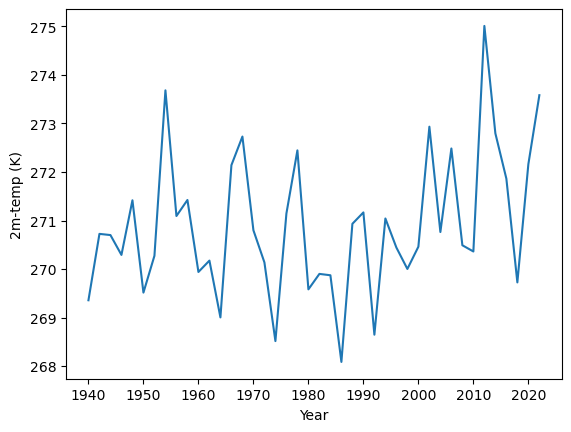

In [18]:
# first average over the whole space, then maximize over each year    
ts_annual90Percentile_TargetTemp = np.array([ts_targetTemp[y*N:(y+1)*N].max() 
                                             for y in range(0, N_years-1)])

import matplotlib.pyplot as plt
plt.plot(ts_annual90Percentile_TargetTemp)
plt.xlabel("Year")
plt.ylabel("2m-temp (K)")

# for 0125 dataset, set the x-axis to be year 1940, 1942, ..., 2024, but only show every decade
plt.xticks(np.arange(0, N_years-1, 5), np.arange(1940, 2024, 10))


([<matplotlib.axis.XTick at 0x2837a209750>,
 [Text(0, 0, '1940'),
  Text(5, 0, '1950'),
  Text(10, 0, '1960'),
  Text(15, 0, '1970'),
  Text(20, 0, '1980'),
  Text(25, 0, '1990'),
  Text(30, 0, '2000'),
  Text(35, 0, '2010'),
  Text(40, 0, '2020')])

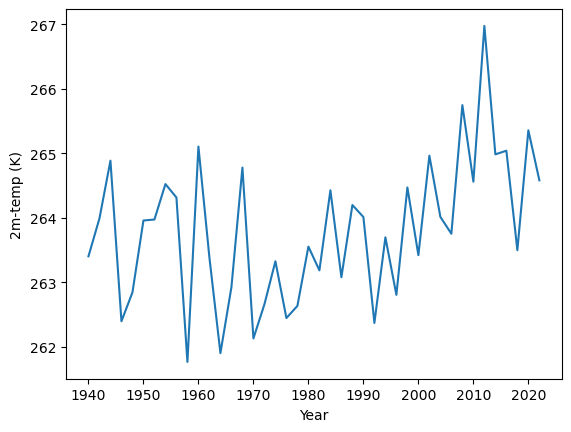

In [19]:
# first average over the whole space, then maximize over each year    
ts_annualMax_TargetTemp = np.array([np.percentile(ts_targetTemp[y*N:(y+1)*N], 90) 
                                             for y in range(0, N_years-1)])    
    
import matplotlib.pyplot as plt
plt.plot(ts_annualMax_TargetTemp)
plt.xlabel("Year")
plt.ylabel("2m-temp (K)")

# for 0125 dataset, set the x-axis to be year 1940, 1942, ..., 2024, but only show every decade
plt.xticks(np.arange(0, N_years-1, 5), np.arange(1940, 2024, 10))

In [20]:
# # 预定义经纬度范围（避免重复计算）
# lat1, lon1 = lat_target, lon_target
# lat2, lon2 = lat_target, lon_target

# # 使用列表推导式替代显式循环
# msgs.rewind()
# ts_targetTemp = np.array([msg.data(lat1=lat1, lon1=lon1, lat2=lat2, lon2=lon2)[0][0][0] for msg in msgs])

## No help for accelerating the computation

In [21]:
msgs.close()